Task 1:

Read the dataset from the below link
https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_
Names/US_Baby_Names_right.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [4]:
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


1. Delete unnamed columns

In [5]:
df.columns

Index(['Unnamed: 0', 'Id', 'Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [8]:
df['Gender_new']=df['Gender'].map({'F':'Female','M':'Male'})

In [9]:
df.head()

,Id,Name,Year,Gender,State,Count,Gender_new
0,11350,Emma,2004,F,AK,62,Female
1,11351,Madison,2004,F,AK,48,Female
2,11352,Hannah,2004,F,AK,46,Female
3,11353,Grace,2004,F,AK,44,Female
4,11354,Emily,2004,F,AK,41,Female


2. Show the distribution of male and female

In [10]:
df['Gender_new'].value_counts()

Female    558846
Male      457549
Name: Gender_new, dtype: int64

3. Show the top 5 most preferred names

In [11]:
df['Name'].value_counts()[0:5]

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Name: Name, dtype: int64

4. What is the median name occurence in the dataset


In [12]:
n=df['Name'].count()
n

1016395

In [13]:
mn=(n+1)/2

In [14]:
mn

508198.0

In [15]:
df.sort_values(by='Name').iloc[int(mn)]['Name']

'Jocelyn'

5. Distribution of male and female born count by states

In [35]:
df1=df[df['Gender']=='F']
df2=df[df['Gender']=='M']
df3=df1.groupby('State')['Gender','Count'].sum()
df4=df2.groupby('State')['Gender','Count'].sum()

In [38]:
dfres=pd.merge(df3,df4,how='inner',on='State')

In [42]:
dfres.rename(columns={'Count_x':'Count_Female','Count_y':'Count_Male'})

,Count_Female,Count_Male
State,,
AK,26250,37399
AL,215308,260114
AR,129712,162947
AZ,368567,439691
CA,2414063,2670584
CO,260805,313425
CT,141350,171397
DC,35276,47228
DE,31312,41748


Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.
Task:
1. fitting it to the periodic function


In [146]:
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min =[ 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
dftemp=pd.DataFrame()
dftemp['Month']=[1,2,3,4,5,6,7,8,9,10,11,12]
dftemp['Max']=Max
dftemp['Min']=Min

In [147]:
dftemp

,Month,Max,Min
0,1,39,21
1,2,41,23
2,3,43,27
3,4,47,28
4,5,49,32
5,6,51,35
6,7,45,31
7,8,38,28
8,9,37,21
9,10,29,19


In [148]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, dftemp['Month'],
                                      dftemp['Max'], [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, dftemp['Month'],
                                      dftemp['Min'], [-40, 20, 0])

2. plot the fit

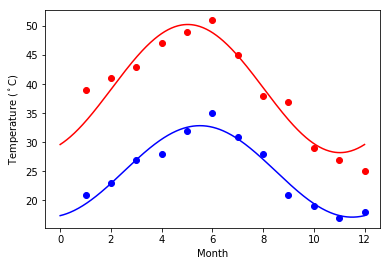

In [149]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(dftemp['Month'], dftemp['Max'], 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(dftemp['Month'], dftemp['Min'], 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()